In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_excel(r"/ANZ synthesised transaction dataset (2).xlsx")
df.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,5.71,2018-08-01,M,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,2117.22,2018-08-01,F,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,17.95,2018-08-01,F,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


# ***This is total number of unique customers***

In [45]:
df["account"].nunique()

100

In [47]:
df["customer_id"].nunique()

100

# ***Data Cleaning to make my analysis run faster ***

In [48]:
df = df[["status","card_present_flag","balance","date",
                   "gender","age","merchant_suburb","merchant_state",
                   "amount","customer_id","movement"]]
df["date"] = pd.to_datetime(df["date"])
df.head()

,status,card_present_flag,balance,date,gender,age,merchant_suburb,merchant_state,amount,customer_id,movement
0,authorized,1.0,35.39,2018-08-01,F,26,Ashmore,QLD,16.25,CUS-2487424745,debit
1,authorized,0.0,21.20,2018-08-01,F,26,Sydney,NSW,14.19,CUS-2487424745,debit
2,authorized,1.0,5.71,2018-08-01,M,38,Sydney,NSW,6.42,CUS-2142601169,debit
3,authorized,1.0,2117.22,2018-08-01,F,40,Buderim,QLD,40.90,CUS-1614226872,debit
4,authorized,1.0,17.95,2018-08-01,F,26,Mermaid Beach,QLD,3.25,CUS-2487424745,debit


# ***Number of Transactions on each day ***

In [50]:
df["date"].value_counts()


2018-09-28    174
2018-08-17    172
2018-10-05    168
2018-10-17    162
2018-09-14    161
             ... 
2018-08-06     99
2018-08-20     97
2018-10-23     96
2018-10-08     95
2018-10-30     89
Name: date, Length: 91, dtype: int64

# Number Of Transactions Made By Each Customer (first ten rows)

In [51]:
df["customer_id"].value_counts().head(10)

CUS-2487424745    578
CUS-2142601169    303
CUS-3026014945    292
CUS-3378712515    260
CUS-1614226872    259
CUS-1196156254    245
CUS-2695611575    239
CUS-51506836      239
CUS-860700529     233
CUS-1669695324    230
Name: customer_id, dtype: int64

# Transcation volume each day 

In [52]:
df_date_count = df.groupby("date").count()

In [53]:
trans_vol = df_date_count["customer_id"].mean()
n_points = len(df_date_count.index)

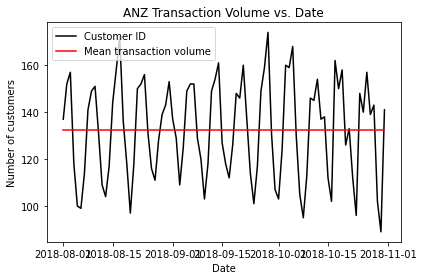

In [54]:
plt.figure()
plt.plot(df_date_count.index, df_date_count["customer_id"], c="black", label = "Customer ID")
plt.plot(df_date_count.index, np.linspace(trans_vol,trans_vol,n_points), c="r", label = "Mean transaction volume")
plt.title("ANZ Transaction Volume vs. Date")
plt.xlabel("Date")
plt.ylabel("Number of customers")
plt.legend()
plt.tight_layout()
plt.show()

# ***Mean transaction amount each day***

In [17]:
df_date_mean = df.groupby("date").mean()

In [18]:
trans_amt = df_date_mean["amount"].mean()
n_points = len(df_date_count.index)

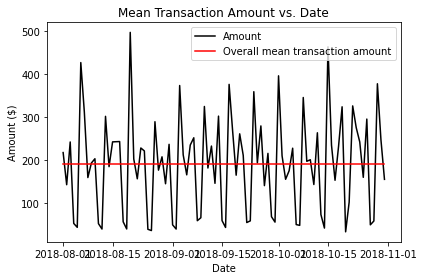

In [55]:
plt.figure()
plt.plot(df_date_count.index, df_date_mean["amount"], c="black", label = "Amount")
plt.plot(df_date_count.index, np.linspace(trans_amt,trans_amt,n_points), c="r", label = "Overall mean transaction amount")
plt.title("Mean Transaction Amount vs. Date")
plt.xlabel("Date")
plt.ylabel("Amount ($)")
plt.legend()
plt.tight_layout()
plt.show()

In [20]:
months = []
for date in df["date"]:
    if date.month == 8:
        months.append("August")
    elif date.month == 9:
        months.append("September")
    elif date.month == 10:
        months.append("October")

df["Months"] = months
df["Months"].head()

0    August
1    August
2    August
3    August
4    August
Name: Months, dtype: object

# Mean customer balance and payment amount by age

In [21]:
df_cus_aug = df[df["Months"] == "August"].groupby("customer_id").mean()
df_gen_aug = df[df["Months"] == "August"].groupby("gender").mean()

In [22]:
mean_f_bal_aug = df_gen_aug["balance"].iloc[0]
mean_m_bal_aug = df_gen_aug["balance"].iloc[1]
n_points = len(df_cus_aug["age"])

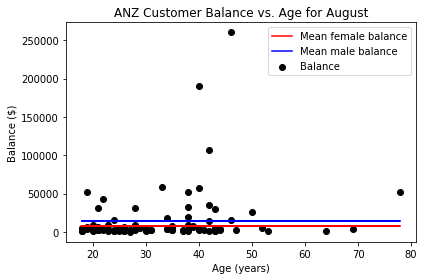

In [23]:
plt.figure()
plt.scatter(df_cus_aug["age"], df_cus_aug["balance"], c="black", label="Balance")
plt.plot(df_cus_aug["age"], np.linspace(mean_f_bal_aug,mean_f_bal_aug,n_points), c="r", label = "Mean female balance")
plt.plot(df_cus_aug["age"], np.linspace(mean_m_bal_aug,mean_m_bal_aug,n_points), c="b", label = "Mean male balance")
plt.title("ANZ Customer Balance vs. Age for August")
plt.xlabel("Age (years)")
plt.ylabel("Balance ($)")
plt.legend()
plt.tight_layout()
plt.show()

In [24]:
mean_f_amt_aug = df_gen_aug["amount"].iloc[0]
mean_m_amt_aug = df_gen_aug["amount"].iloc[1]

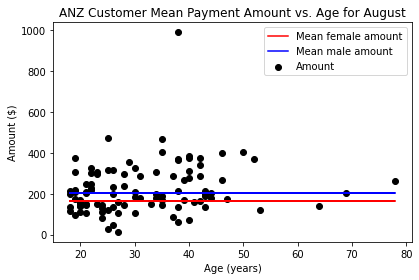

In [25]:
plt.scatter(df_cus_aug["age"], df_cus_aug["amount"], c="black", label="Amount")
plt.plot(df_cus_aug["age"], np.linspace(mean_f_amt_aug,mean_f_amt_aug,n_points), c="r", label = "Mean female amount")
plt.plot(df_cus_aug["age"], np.linspace(mean_m_amt_aug,mean_m_amt_aug,n_points), c="b", label = "Mean male amount")
plt.title("ANZ Customer Mean Payment Amount vs. Age for August")
plt.xlabel("Age (years)")
plt.ylabel("Amount ($)")
plt.legend()
plt.tight_layout()

In [26]:
df_cus_sep = df[df["Months"] == "September"].groupby("customer_id").mean()
df_gen_sep = df[df["Months"] == "September"].groupby("gender").mean()

In [27]:
mean_f_bal_sep = df_gen_sep["balance"].iloc[0]
mean_m_bal_sep = df_gen_sep["balance"].iloc[1]
n_points = len(df_cus_sep["age"])

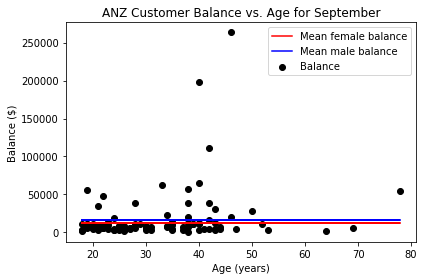

In [28]:
plt.figure()
plt.scatter(df_cus_sep["age"], df_cus_sep["balance"], c="black", label="Balance")
plt.plot(df_cus_sep["age"], np.linspace(mean_f_bal_sep,mean_f_bal_sep,n_points), c="r", label = "Mean female balance")
plt.plot(df_cus_sep["age"], np.linspace(mean_m_bal_sep,mean_m_bal_sep,n_points), c="b", label = "Mean male balance")
plt.title("ANZ Customer Balance vs. Age for September")
plt.xlabel("Age (years)")
plt.ylabel("Balance ($)")
plt.legend()
plt.tight_layout()

In [29]:
mean_f_amt_sep = df_gen_sep["amount"].iloc[0]
mean_m_amt_sep = df_gen_sep["amount"].iloc[1]

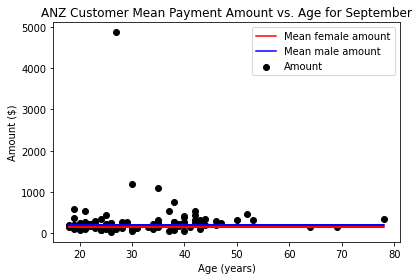

In [30]:
plt.scatter(df_cus_sep["age"], df_cus_sep["amount"], c="black", label="Amount")
plt.plot(df_cus_sep["age"], np.linspace(mean_f_amt_sep,mean_f_amt_sep,n_points), c="r", label = "Mean female amount")
plt.plot(df_cus_sep["age"], np.linspace(mean_m_amt_sep,mean_m_amt_sep,n_points), c="b", label = "Mean male amount")
plt.title("ANZ Customer Mean Payment Amount vs. Age for September")
plt.xlabel("Age (years)")
plt.ylabel("Amount ($)")
plt.legend()
plt.tight_layout()

In [31]:
df_cus_oct = df[df["Months"] == "October"].groupby("customer_id").mean()
df_gen_oct = df[df["Months"] == "October"].groupby("gender").mean()

In [32]:
mean_f_bal_oct = df_gen_oct["balance"].iloc[0]
mean_m_bal_oct = df_gen_oct["balance"].iloc[1]
n_points = len(df_cus_oct["age"])

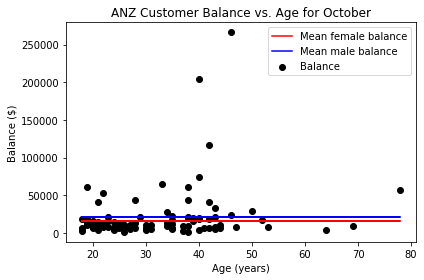

In [33]:
plt.figure()
plt.scatter(df_cus_oct["age"], df_cus_oct["balance"], c="black", label="Balance")
plt.plot(df_cus_oct["age"], np.linspace(mean_f_bal_oct,mean_f_bal_oct,n_points), c="r", label = "Mean female balance")
plt.plot(df_cus_oct["age"], np.linspace(mean_m_bal_oct,mean_m_bal_oct,n_points), c="b", label = "Mean male balance")
plt.title("ANZ Customer Balance vs. Age for October")
plt.xlabel("Age (years)")
plt.ylabel("Balance ($)")
plt.legend()
plt.tight_layout()


In [34]:
mean_f_amt_oct = df_gen_oct["amount"].iloc[0]
mean_m_amt_oct = df_gen_oct["amount"].iloc[1]

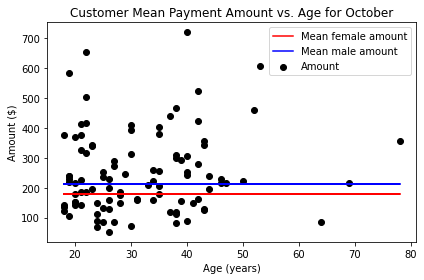

In [37]:
plt.scatter(df_cus_oct["age"], df_cus_oct["amount"], c="black", label="Amount")
plt.plot(df_cus_oct["age"], np.linspace(mean_f_amt_oct,mean_f_amt_oct,n_points), c="r", label = "Mean female amount")
plt.plot(df_cus_oct["age"], np.linspace(mean_m_amt_oct,mean_m_amt_oct,n_points), c="b", label = "Mean male amount")
plt.title("Customer Mean Payment Amount vs. Age for October")
plt.xlabel("Age (years)")
plt.ylabel("Amount ($)")
plt.legend()
plt.tight_layout()

In [36]:
corr = df.corr(method='pearson')
corr

,card_present_flag,balance,age,amount
card_present_flag,1.000000,0.005925,-0.008405,-0.002074
balance,0.005925,1.000000,0.199329,0.059178
age,-0.008405,0.199329,1.000000,0.029980
amount,-0.002074,0.059178,0.029980,1.000000
